# Part 3 : The international diversification strategy

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
pd.set_option('display.max_columns', None)

In [128]:
df = pd.read_csv('../data/final/merged_all_data.csv', index_col=0)

df = df.drop(columns={col for col in df.columns if col.startswith(('fic', 'currency'))})
df.head()

,mportret_AUSTRALIA,mportretx_AUSTRALIA,mportret_SWITZERLAND,mportretx_SWITZERLAND,mportret_GERMANY,mportretx_GERMANY,mportret_FRANCE,mportretx_FRANCE,mportret_UNITED KINGDOM,mportretx_UNITED KINGDOM,mportret_JAPAN,mportretx_JAPAN,rm_US,rf_US,fx_USUK,fx_SZUS,fx_JPUS,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,1.6709,132.6833,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,1.6970,133.6426,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,1.6743,131.0610,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,1.6542,130.7718,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,1.5889,126.3750,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370


### **(a)** Returns computed in USD

In [129]:
mapping = {
    'AUSTRALIA' : 'AUS',
    'SWITZERLAND' : 'CHE',
    'GERMANY' : 'DEU',
    'FRANCE' : 'FRA',
    'UNITED KINGDOM' : 'UK',
    'JAPAN' : 'JPN'
}
columns_to_rename = {col for col in df.columns if col.split('_')[-1] in mapping.keys()}

df = df.rename(columns={col: col.replace(col.split('_')[1], mapping[col.split('_')[1]]) for col in columns_to_rename})

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_USUK,fx_SZUS,fx_JPUS,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,1.6709,132.6833,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,1.6970,133.6426,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,1.6743,131.0610,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,1.6542,130.7718,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,1.5889,126.3750,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370


In [130]:
df['fx_USSZ'] = 1 / df['fx_SZUS']
df['fx_USJP'] = 1 / df['fx_JPUS']

df = df.drop(columns=['fx_SZUS', 'fx_JPUS'])

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_USUK,fx_USAL,fx_USEU,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_USSZ,fx_USJP
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913


In [131]:
mapping_fx_columns = {
    'fx_USUK' : 'fx_US_UK',
    'fx_USAL' : 'fx_US_AL',
    'fx_USEU' : 'fx_US_EUR',
    'fx_USSZ' : 'fx_US_CHF',
    'fx_USJP' : 'fx_US_JPY'
}

fx_columns = [col for col in df.columns if col.startswith('fx_')]

df = df.rename(columns={col: mapping_fx_columns[col] for col in fx_columns if col in fx_columns})

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_US_CHF,fx_US_JPY
date,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913


In [132]:
fx_columns = [ col for col in df.columns if col.startswith('fx_') and not col.endswith('_ret') ]

for fx_col in fx_columns:
    df[f'{fx_col}_ret'] = df[fx_col].pct_change()
    df[f'{fx_col}_ret'] = df[f'{fx_col}_ret'].shift(-1)

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537,-0.006633,-0.008124,-0.014153,-0.015380,-0.007178
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483,0.000211,0.024961,0.006776,0.013558,0.019698
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630,0.013985,0.018265,0.010723,0.012151,0.002211
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647,0.011713,0.027280,0.034989,0.041098,0.034792
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913,0.016372,0.033467,0.042639,0.031820,0.025018


In [133]:
fx_mapping = {
    'AUS': 'fx_US_AL_ret',
    'CHE': 'fx_US_CHF_ret',
    'DEU': 'fx_US_EUR_ret',
    'FRA': 'fx_US_EUR_ret',
    'UK': 'fx_US_UK_ret',
    'JPN': 'fx_US_JPY_ret'
}

for col in [col for col in df.columns if col.startswith('mportret_')]:
    
    df[f'{col}_us_adjusted'] = df[col] * ( 1 + df[fx_mapping[col.split('_')[1]]])

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,euro_interbank,ch_interbank,us_interbank,australia_interbank,japan_interbank,uk_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537,-0.006633,-0.008124,-0.014153,-0.015380,-0.007178,0.027136,-0.021786,0.012103,-0.026721,-0.010794,-0.056248
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483,0.000211,0.024961,0.006776,0.013558,0.019698,-0.001878,0.011819,-0.008867,-0.004424,-0.003341,0.043088
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630,0.013985,0.018265,0.010723,0.012151,0.002211,0.005294,0.049352,0.049857,0.052639,0.039474,0.053237
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647,0.011713,0.027280,0.034989,0.041098,0.034792,-0.014692,-0.004277,-0.046606,-0.045527,-0.013518,0.021302
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913,0.016372,0.033467,0.042639,0.031820,0.025018,-0.000211,0.003057,-0.026799,-0.029211,-0.011670,0.036888


### **(b)** currency hedged index returns

In [134]:
interbank_mapping = {
    'uk' : 'UK_interbank',
    'japan': 'JPY_interbank', 
    'ch' : 'CHF_interbank',
    'us' : 'US_interbank',
    'australia': 'AUD_interbank',
    'euro' : 'EUR_interbank'
}

df = df.rename(columns={col: interbank_mapping[col.split('_')[0]] for col in df.columns if col.endswith('interbank')})

for col in [col for col in df.columns if col.endswith('interbank')]:
    
    df[f"rf_{col.split('_')[0]}_monthly"] = df[col] / 12 / 100

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537,-0.006633,-0.008124,-0.014153,-0.015380,-0.007178,0.027136,-0.021786,0.012103,-0.026721,-0.010794,-0.056248,0.002782,0.001336,0.001450,0.003550,NaN,0.003372
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483,0.000211,0.024961,0.006776,0.013558,0.019698,-0.001878,0.011819,-0.008867,-0.004424,-0.003341,0.043088,0.002798,0.001306,0.001517,0.003592,NaN,0.003377
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630,0.013985,0.018265,0.010723,0.012151,0.002211,0.005294,0.049352,0.049857,0.052639,0.039474,0.053237,0.002826,0.001337,0.001592,0.003717,NaN,0.003442
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647,0.011713,0.027280,0.034989,0.041098,0.034792,-0.014692,-0.004277,-0.046606,-0.045527,-0.013518,0.021302,0.002839,0.001217,0.001558,0.003825,0.000083,0.003478
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913,0.016372,0.033467,0.042639,0.031820,0.025018,-0.000211,0.003057,-0.026799,-0.029211,-0.011670,0.036888,0.002889,0.000970,0.001517,0.004033,0.000067,0.003461


In [135]:
hedging_mapping = {
    'fx_US_CHF_ret': 'rf_CHF_monthly',
    'fx_US_JPY_ret': 'rf_JPY_monthly',
    'fx_US_UK_ret': 'rf_UK_monthly',
    'fx_US_AL_ret': 'rf_AUD_monthly',
    'fx_US_EUR_ret': 'rf_EUR_monthly',
}

columns_hedging = [col for col in hedging_mapping.keys()]

for col in columns_hedging:
    df[f'{col}_hedging'] = (1 + df[col]) * ( 1 + df[hedging_mapping[col]]) - ( 1 + df['rf_US'] )

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537,-0.006633,-0.008124,-0.014153,-0.015380,-0.007178,0.027136,-0.021786,0.012103,-0.026721,-0.010794,-0.056248,0.002782,0.001336,0.001450,0.003550,NaN,0.003372,-0.015472,NaN,-0.004691,-0.006011,-0.012818
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483,0.000211,0.024961,0.006776,0.013558,0.019698,-0.001878,0.011819,-0.008867,-0.004424,-0.003341,0.043088,0.002798,0.001306,0.001517,0.003592,NaN,0.003377,0.013437,NaN,0.002145,0.027198,0.008149
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630,0.013985,0.018265,0.010723,0.012151,0.002211,0.005294,0.049352,0.049857,0.052639,0.039474,0.053237,0.002826,0.001337,0.001592,0.003717,NaN,0.003442,0.012079,NaN,0.016050,0.020625,0.012154
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647,0.011713,0.027280,0.034989,0.041098,0.034792,-0.014692,-0.004277,-0.046606,-0.045527,-0.013518,0.021302,0.002839,0.001217,0.001558,0.003825,0.000083,0.003478,0.040904,0.033417,0.013770,0.029748,0.036467
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913,0.016372,0.033467,0.042639,0.031820,0.025018,-0.000211,0.003057,-0.026799,-0.029211,-0.011670,0.036888,0.002889,0.000970,0.001517,0.004033,0.000067,0.003461,0.031413,0.023679,0.018482,0.036227,0.044244


In [136]:
mapping_currency_hedged = { 
    'mportret_AUS_us_adjusted': 'fx_US_AL_ret_hedging',
    'mportret_CHE_us_adjusted': 'fx_US_CHF_ret_hedging',
    'mportret_DEU_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_FRA_us_adjusted': 'fx_US_EUR_ret_hedging',
    'mportret_UK_us_adjusted': 'fx_US_UK_ret_hedging',
    'mportret_JPN_us_adjusted': 'fx_US_JPY_ret_hedging'
}

for col in mapping_currency_hedged.keys():
    df[f'{col}_hedged'] = df[col] - df[mapping_currency_hedged[col]]

df.head()

,mportret_AUS,mportretx_AUS,mportret_CHE,mportretx_CHE,mportret_DEU,mportretx_DEU,mportret_FRA,mportretx_FRA,mportret_UK,mportretx_UK,mportret_JPN,mportretx_JPN,rm_US,rf_US,fx_US_UK,fx_US_AL,fx_US_EUR,EUR_interbank,CHF_interbank,US_interbank,AUD_interbank,JPY_interbank,UK_interbank,fx_US_CHF,fx_US_JPY,fx_US_UK_ret,fx_US_AL_ret,fx_US_EUR_ret,fx_US_CHF_ret,fx_US_JPY_ret,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_EUR_monthly,rf_CHF_monthly,rf_US_monthly,rf_AUD_monthly,rf_JPY_monthly,rf_UK_monthly,fx_US_CHF_ret_hedging,fx_US_JPY_ret_hedging,fx_US_UK_ret_hedging,fx_US_AL_ret_hedging,fx_US_EUR_ret_hedging,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-31,0.027358,0.027313,-0.022126,-0.022146,0.012277,0.011491,-0.027105,-0.027306,-0.010866,-0.011720,-0.056655,-0.056710,-0.015966,0.001408,1.4322,0.5170,0.8832,3.338773,1.603725,1.74,4.26,NaN,4.04677,0.598480,0.007537,-0.006633,-0.008124,-0.014153,-0.015380,-0.007178,0.027136,-0.021786,0.012103,-0.026721,-0.010794,-0.056248,0.002782,0.001336,0.001450,0.003550,NaN,0.003372,-0.015472,NaN,-0.004691,-0.006011,-0.012818,0.033146,-0.006314,0.024922,-0.013903,-0.006103,NaN
2002-02-28,-0.001832,-0.004358,0.011661,0.011646,-0.008807,-0.008816,-0.004394,-0.004447,-0.003341,-0.007072,0.042256,0.041998,-0.021700,0.001444,1.4227,0.5128,0.8707,3.357100,1.566671,1.82,4.31,NaN,4.05268,0.589275,0.007483,0.000211,0.024961,0.006776,0.013558,0.019698,-0.001878,0.011819,-0.008867,-0.004424,-0.003341,0.043088,0.002798,0.001306,0.001517,0.003592,NaN,0.003377,0.013437,NaN,0.002145,0.027198,0.008149,-0.029076,-0.001618,-0.017016,-0.012573,-0.005486,NaN
2002-03-28,0.005199,-0.001914,0.048759,0.045570,0.049328,0.048470,0.052081,0.051943,0.038930,0.033661,0.053119,0.048294,0.044698,0.001425,1.4230,0.5256,0.8766,3.390800,1.604164,1.91,4.46,NaN,4.13055,0.597265,0.007630,0.013985,0.018265,0.010723,0.012151,0.002211,0.005294,0.049352,0.049857,0.052639,0.039474,0.053237,0.002826,0.001337,0.001592,0.003717,NaN,0.003442,0.012079,NaN,0.016050,0.020625,0.012154,-0.015331,0.037273,0.037703,0.040485,0.023425,NaN
2002-04-30,-0.014302,-0.015424,-0.004109,-0.007961,-0.045031,-0.047093,-0.043988,-0.045755,-0.013362,-0.015411,0.020586,0.020574,-0.049600,0.001461,1.4429,0.5352,0.8860,3.406905,1.460647,1.87,4.59,0.10,4.17319,0.604522,0.007647,0.011713,0.027280,0.034989,0.041098,0.034792,-0.014692,-0.004277,-0.046606,-0.045527,-0.013518,0.021302,0.002839,0.001217,0.001558,0.003825,0.000083,0.003478,0.040904,0.033417,0.013770,0.029748,0.036467,-0.044440,-0.045182,-0.083073,-0.081993,-0.027289,-0.012115
2002-05-31,-0.000204,-0.001752,0.002963,-0.000639,-0.025703,-0.033068,-0.028016,-0.035487,-0.011482,-0.013937,0.035987,0.035920,-0.010510,0.001408,1.4598,0.5498,0.9170,3.467136,1.163494,1.82,4.84,0.08,4.15370,0.629366,0.007913,0.016372,0.033467,0.042639,0.031820,0.025018,-0.000211,0.003057,-0.026799,-0.029211,-0.011670,0.036888,0.002889,0.000970,0.001517,0.004033,0.000067,0.003461,0.031413,0.023679,0.018482,0.036227,0.044244,-0.036438,-0.028356,-0.071042,-0.073454,-0.030153,0.013209


### **(c)** implementation of strategies for us diversification

#### Equal weight

In [137]:
non_hedged_columns = [col for col in df.columns if col.startswith('mportret_') and 'us_adjusted' in col and not col.endswith('_hedged')] + ['rf_US']
hedged_columns = [col for col in df.columns if col.endswith('_hedged')] + ['rf_US']

df_non_hedged_columns = df[non_hedged_columns]
df_hedged_columns = df[hedged_columns]

print(df_non_hedged_columns.head())
print('--'*20)
print(df_hedged_columns.head())

            mportret_AUS_us_adjusted  mportret_CHE_us_adjusted  \
date                                                             
2002-01-31                  0.027136                 -0.021786   
2002-02-28                 -0.001878                  0.011819   
2002-03-28                  0.005294                  0.049352   
2002-04-30                 -0.014692                 -0.004277   
2002-05-31                 -0.000211                  0.003057   

            mportret_DEU_us_adjusted  mportret_FRA_us_adjusted  \
date                                                             
2002-01-31                  0.012103                 -0.026721   
2002-02-28                 -0.008867                 -0.004424   
2002-03-28                  0.049857                  0.052639   
2002-04-30                 -0.046606                 -0.045527   
2002-05-31                 -0.026799                 -0.029211   

            mportret_UK_us_adjusted  mportret_JPN_us_adjusted     rf_US  


In [138]:
df_hedged_columns['equal_weight_ret'] = df_hedged_columns.mean(axis=1)
df_non_hedged_columns['equal_weight_ret'] = df_non_hedged_columns.mean(axis=1)

df_hedged_columns['cum_prod_equal_weight'] = (1 + df_hedged_columns['equal_weight_ret']).cumprod() #/ df_hedged_columns['equal_weight_ret'].iloc[0]
df_non_hedged_columns['cum_prod_equal_weight'] = (1 + df_non_hedged_columns['equal_weight_ret']).cumprod() #/ df_non_hedged_columns['equal_weight_ret'].iloc[0]

/var/folders/mc/qf75k40s6ns_nr8c35wdmp400000gn/T/ipykernel_76734/200826055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hedged_columns['equal_weight_ret'] = df_hedged_columns.mean(axis=1)
/var/folders/mc/qf75k40s6ns_nr8c35wdmp400000gn/T/ipykernel_76734/200826055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_hedged_columns['equal_weight_ret'] = df_non_hedged_columns.mean(axis=1)
/var/folders/mc/qf75k40s6ns_nr8c35wdmp400000gn/T/ipykernel_76734/200826055.py:4: SettingWithCopyWarning: 
A 

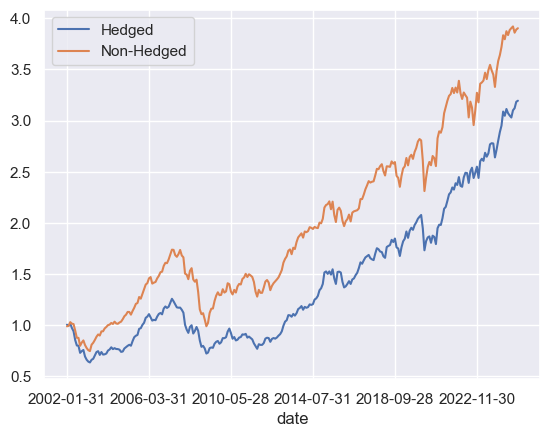

In [139]:
import matplotlib.pyplot as plt

df_hedged_columns['cum_prod_equal_weight'].plot()
df_non_hedged_columns['cum_prod_equal_weight'].plot()

plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [140]:
def compute_sharpe_ratio(series, rf):
    return (series - rf).mean() * np.sqrt(252) / series.std()

sr_ew_hedged = compute_sharpe_ratio(df_hedged_columns['equal_weight_ret'], df_hedged_columns['rf_US'])
sr_ew_non_hedged = compute_sharpe_ratio(df_non_hedged_columns['equal_weight_ret'], df_non_hedged_columns['rf_US'])

print(f'The SR of the EW non hedged startegy is : {sr_ew_non_hedged}')
print(f'The mean of the returns is : {df_non_hedged_columns["equal_weight_ret"].mean()}')
print(f'The standard deviation of the returns is : {df_non_hedged_columns["equal_weight_ret"].std()}')
print('--'*20)
print(f'The SR of the EW hedged startegy is : {sr_ew_hedged}')
print(f'The mean of the returns is : {df_hedged_columns["equal_weight_ret"].mean()}')
print(f'The standard deviation of the returns is : {df_hedged_columns["equal_weight_ret"].std()}')


The SR of the EW non hedged startegy is : 2.0702979351354274
The mean of the returns is : 0.00547250304588656
The standard deviation of the returns is : 0.032337103786838
----------------------------------------
The SR of the EW hedged startegy is : 1.6835165801849172
The mean of the returns is : 0.004769397543864287
The standard deviation of the returns is : 0.03313658209963708


#### Risk parity ( without indication doing the unlevered version )

In [141]:
df_rp_hedged = df_hedged_columns.copy()
df_rp_non_hedged = df_non_hedged_columns.copy()

In [142]:
index_columns = [col for col in df_rp_non_hedged.columns if col.startswith('mportret_')]

for col in index_columns:
    df_rp_hedged.loc[:,f'rolling_std_{col}_hedged'] = df_rp_hedged.loc[:,col + '_hedged'].rolling(window=60).std()
    df_rp_non_hedged.loc[:,f'rolling_std_{col}'] = df_rp_non_hedged.loc[:,col].rolling(window=60).std()

df_rp_hedged.dropna(inplace=True)
df_rp_non_hedged.dropna(inplace=True)

In [143]:
df_rp_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted_hedged,rolling_std_mportret_CHE_us_adjusted_hedged,rolling_std_mportret_DEU_us_adjusted_hedged,rolling_std_mportret_FRA_us_adjusted_hedged,rolling_std_mportret_UK_us_adjusted_hedged,rolling_std_mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,
2007-03-30,-0.008156,0.031233,0.014912,0.013287,0.011593,0.002682,0.004209,0.009966,1.180797,0.030082,0.049904,0.058368,0.050954,0.041807,0.049562
2007-04-30,0.031212,0.068524,0.054005,0.047156,0.024444,0.009197,0.003962,0.034071,1.221028,0.029619,0.050157,0.057700,0.050129,0.041760,0.049476
2007-05-31,0.007620,0.024094,0.058572,0.050629,0.023562,0.046318,0.003912,0.030672,1.258480,0.029122,0.050004,0.057295,0.049490,0.041652,0.049690
2007-06-29,-0.031122,-0.043104,-0.015739,-0.017191,-0.037618,0.003382,0.003776,-0.019659,1.233739,0.029483,0.047081,0.055258,0.046584,0.037769,0.046017
2007-07-31,0.026833,-0.036222,-0.029993,-0.037808,-0.023122,-0.078114,0.004255,-0.024882,1.203041,0.029470,0.044730,0.053903,0.045278,0.036407,0.046884


In [144]:
rolling_std_columns = [col for col in df_rp_non_hedged.columns if col.startswith('rolling_std')]

for col in rolling_std_columns:

    df_rp_hedged[f'weight_{col}_hedged'] = 1 / df_rp_hedged[col+'_hedged']
    df_rp_non_hedged[f'weight_{col}'] = 1 / df_rp_non_hedged[col]

df_rp_non_hedged.head()

,mportret_AUS_us_adjusted,mportret_CHE_us_adjusted,mportret_DEU_us_adjusted,mportret_FRA_us_adjusted,mportret_UK_us_adjusted,mportret_JPN_us_adjusted,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted,rolling_std_mportret_CHE_us_adjusted,rolling_std_mportret_DEU_us_adjusted,rolling_std_mportret_FRA_us_adjusted,rolling_std_mportret_UK_us_adjusted,rolling_std_mportret_JPN_us_adjusted,weight_rolling_std_mportret_AUS_us_adjusted,weight_rolling_std_mportret_CHE_us_adjusted,weight_rolling_std_mportret_DEU_us_adjusted,weight_rolling_std_mportret_FRA_us_adjusted,weight_rolling_std_mportret_UK_us_adjusted,weight_rolling_std_mportret_JPN_us_adjusted
date,,,,,,,,,,,,,,,,,,,,,
2006-12-29,0.037821,0.045508,0.046910,0.043964,0.033906,0.046555,0.003974,0.036948,1.579911,0.025890,0.041926,0.054846,0.045962,0.037151,0.043454,38.624622,23.851741,18.232727,21.757070,26.916974,23.012915
2007-01-31,0.019189,0.041853,0.034374,0.010940,-0.001682,0.024286,0.004167,0.019018,1.609958,0.025836,0.041961,0.054948,0.045740,0.037094,0.042599,38.705302,23.831845,18.199054,21.862886,26.958741,23.474819
2007-02-28,0.017537,-0.033953,-0.006937,-0.010474,-0.001668,0.016566,0.004286,-0.002092,1.606590,0.025772,0.042327,0.054938,0.045775,0.037086,0.042404,38.802306,23.625709,18.202324,21.845972,26.964406,23.582594
2007-03-30,0.036214,0.033286,0.034168,0.032542,0.032901,-0.015046,0.004209,0.022611,1.642916,0.025923,0.042114,0.054776,0.045518,0.037000,0.042172,38.576504,23.745154,18.256199,21.969380,27.026965,23.712140
2007-04-30,0.030340,0.059277,0.053727,0.046878,0.023319,-0.009474,0.003962,0.029719,1.691742,0.025742,0.042592,0.054598,0.045240,0.036949,0.042221,38.847618,23.478615,18.315585,22.104483,27.063995,23.685129


In [145]:
weight_columns_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('weight')]
weight_columns_hedged = [col for col in df_rp_hedged.columns if col.startswith('weight')]

weights_strat_non_hedged = []
weights_strat_hedged = []

for col in weight_columns_non_hedged:
    df_rp_non_hedged[f'standardized_{col}'] = df_rp_non_hedged[col] / df_rp_non_hedged[weight_columns_non_hedged].sum(axis=1)
    weights_strat_non_hedged.append(f'standardized_{col}')

for col in weight_columns_hedged:
    df_rp_hedged[f'standardized_{col}'] = df_rp_hedged[col] / df_rp_hedged[weight_columns_hedged].sum(axis=1)
    weights_strat_hedged.append(f'standardized_{col}')

df_rp_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted_hedged,rolling_std_mportret_CHE_us_adjusted_hedged,rolling_std_mportret_DEU_us_adjusted_hedged,rolling_std_mportret_FRA_us_adjusted_hedged,rolling_std_mportret_UK_us_adjusted_hedged,rolling_std_mportret_JPN_us_adjusted_hedged,weight_rolling_std_mportret_AUS_us_adjusted_hedged,weight_rolling_std_mportret_CHE_us_adjusted_hedged,weight_rolling_std_mportret_DEU_us_adjusted_hedged,weight_rolling_std_mportret_FRA_us_adjusted_hedged,weight_rolling_std_mportret_UK_us_adjusted_hedged,weight_rolling_std_mportret_JPN_us_adjusted_hedged,standardized_weight_rolling_std_mportret_AUS_us_adjusted_hedged,standardized_weight_rolling_std_mportret_CHE_us_adjusted_hedged,standardized_weight_rolling_std_mportret_DEU_us_adjusted_hedged,standardized_weight_rolling_std_mportret_FRA_us_adjusted_hedged,standardized_weight_rolling_std_mportret_UK_us_adjusted_hedged,standardized_weight_rolling_std_mportret_JPN_us_adjusted_hedged
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-03-30,-0.008156,0.031233,0.014912,0.013287,0.011593,0.002682,0.004209,0.009966,1.180797,0.030082,0.049904,0.058368,0.050954,0.041807,0.049562,33.242287,20.038468,17.132558,19.625508,23.919415,20.176722,0.247827,0.149390,0.127726,0.146312,0.178323,0.150421
2007-04-30,0.031212,0.068524,0.054005,0.047156,0.024444,0.009197,0.003962,0.034071,1.221028,0.029619,0.050157,0.057700,0.050129,0.041760,0.049476,33.761577,19.937293,17.330972,19.948362,23.946078,20.212008,0.249834,0.147535,0.128248,0.147617,0.177199,0.149568
2007-05-31,0.007620,0.024094,0.058572,0.050629,0.023562,0.046318,0.003912,0.030672,1.258480,0.029122,0.050004,0.057295,0.049490,0.041652,0.049690,34.338221,19.998245,17.453661,20.206125,24.008452,20.124962,0.252246,0.146906,0.128214,0.148433,0.176365,0.147837
2007-06-29,-0.031122,-0.043104,-0.015739,-0.017191,-0.037618,0.003382,0.003776,-0.019659,1.233739,0.029483,0.047081,0.055258,0.046584,0.037769,0.046017,33.917425,21.240021,18.096977,21.466504,26.476832,21.730954,0.237303,0.148606,0.126615,0.150190,0.185245,0.152041
2007-07-31,0.026833,-0.036222,-0.029993,-0.037808,-0.023122,-0.078114,0.004255,-0.024882,1.203041,0.029470,0.044730,0.053903,0.045278,0.036407,0.046884,33.932682,22.356598,18.551712,22.085758,27.467346,21.329217,0.232857,0.153418,0.127308,0.151560,0.188490,0.146368


In [146]:
ret_columns_hedged = [col for col in df_rp_hedged.columns if col.startswith('mportret_')]
ret_columns_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('mportret_')]

for x, y in zip(ret_columns_hedged, weights_strat_hedged):
    df_rp_hedged[f'strat_{x}'] = df_rp_hedged[x] * df_rp_hedged[y]

for x, y in zip(ret_columns_non_hedged, weights_strat_non_hedged):
    df_rp_non_hedged[f'strat_{x}'] = df_rp_non_hedged[x] * df_rp_non_hedged[y]

In [147]:
strat_col_hedged = [col for col in df_rp_hedged.columns if col.startswith('strat_')]
strat_col_non_hedged = [col for col in df_rp_non_hedged.columns if col.startswith('strat_')]

df_rp_hedged['rp_return'] = df_rp_hedged[strat_col_hedged].sum(axis=1)
df_rp_non_hedged['rp_return'] = df_rp_non_hedged[strat_col_non_hedged].sum(axis=1)

df_rp_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,equal_weight_ret,cum_prod_equal_weight,rolling_std_mportret_AUS_us_adjusted_hedged,rolling_std_mportret_CHE_us_adjusted_hedged,rolling_std_mportret_DEU_us_adjusted_hedged,rolling_std_mportret_FRA_us_adjusted_hedged,rolling_std_mportret_UK_us_adjusted_hedged,rolling_std_mportret_JPN_us_adjusted_hedged,weight_rolling_std_mportret_AUS_us_adjusted_hedged,weight_rolling_std_mportret_CHE_us_adjusted_hedged,weight_rolling_std_mportret_DEU_us_adjusted_hedged,weight_rolling_std_mportret_FRA_us_adjusted_hedged,weight_rolling_std_mportret_UK_us_adjusted_hedged,weight_rolling_std_mportret_JPN_us_adjusted_hedged,standardized_weight_rolling_std_mportret_AUS_us_adjusted_hedged,standardized_weight_rolling_std_mportret_CHE_us_adjusted_hedged,standardized_weight_rolling_std_mportret_DEU_us_adjusted_hedged,standardized_weight_rolling_std_mportret_FRA_us_adjusted_hedged,standardized_weight_rolling_std_mportret_UK_us_adjusted_hedged,standardized_weight_rolling_std_mportret_JPN_us_adjusted_hedged,strat_mportret_AUS_us_adjusted_hedged,strat_mportret_CHE_us_adjusted_hedged,strat_mportret_DEU_us_adjusted_hedged,strat_mportret_FRA_us_adjusted_hedged,strat_mportret_UK_us_adjusted_hedged,strat_mportret_JPN_us_adjusted_hedged,rp_return
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-03-30,-0.008156,0.031233,0.014912,0.013287,0.011593,0.002682,0.004209,0.009966,1.180797,0.030082,0.049904,0.058368,0.050954,0.041807,0.049562,33.242287,20.038468,17.132558,19.625508,23.919415,20.176722,0.247827,0.149390,0.127726,0.146312,0.178323,0.150421,-0.002021,0.004666,0.001905,0.001944,0.002067,0.000403,0.008964
2007-04-30,0.031212,0.068524,0.054005,0.047156,0.024444,0.009197,0.003962,0.034071,1.221028,0.029619,0.050157,0.057700,0.050129,0.041760,0.049476,33.761577,19.937293,17.330972,19.948362,23.946078,20.212008,0.249834,0.147535,0.128248,0.147617,0.177199,0.149568,0.007798,0.010110,0.006926,0.006961,0.004331,0.001376,0.037501
2007-05-31,0.007620,0.024094,0.058572,0.050629,0.023562,0.046318,0.003912,0.030672,1.258480,0.029122,0.050004,0.057295,0.049490,0.041652,0.049690,34.338221,19.998245,17.453661,20.206125,24.008452,20.124962,0.252246,0.146906,0.128214,0.148433,0.176365,0.147837,0.001922,0.003540,0.007510,0.007515,0.004156,0.006847,0.031489
2007-06-29,-0.031122,-0.043104,-0.015739,-0.017191,-0.037618,0.003382,0.003776,-0.019659,1.233739,0.029483,0.047081,0.055258,0.046584,0.037769,0.046017,33.917425,21.240021,18.096977,21.466504,26.476832,21.730954,0.237303,0.148606,0.126615,0.150190,0.185245,0.152041,-0.007385,-0.006406,-0.001993,-0.002582,-0.006969,0.000514,-0.024820
2007-07-31,0.026833,-0.036222,-0.029993,-0.037808,-0.023122,-0.078114,0.004255,-0.024882,1.203041,0.029470,0.044730,0.053903,0.045278,0.036407,0.046884,33.932682,22.356598,18.551712,22.085758,27.467346,21.329217,0.232857,0.153418,0.127308,0.151560,0.188490,0.146368,0.006248,-0.005557,-0.003818,-0.005730,-0.004358,-0.011433,-0.024649


In [148]:
df_rp_hedged['cumprod_rp_return'] = (1 + df_rp_hedged['rp_return']).cumprod()
df_rp_non_hedged['cumprod_rp_return'] = (1 + df_rp_non_hedged['rp_return']).cumprod()

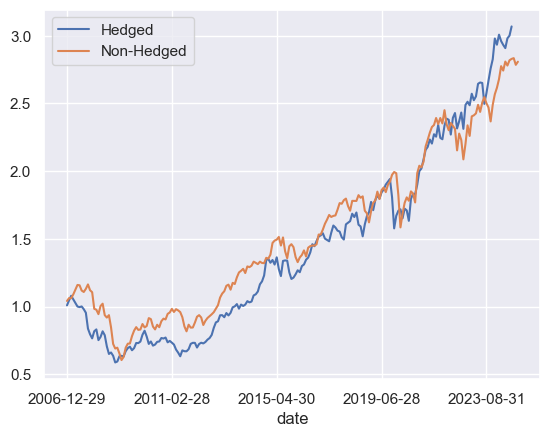

In [149]:
df_rp_hedged['cumprod_rp_return'].plot()
df_rp_non_hedged['cumprod_rp_return'].plot()

plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [150]:
sr_rp_hedged = compute_sharpe_ratio(df_rp_hedged['rp_return'], df_rp_hedged['rf_US'])
sr_rp_non_hedged = compute_sharpe_ratio(df_rp_non_hedged['rp_return'], df_rp_non_hedged['rf_US'])

print(f'The sharpe ratio of the hedged RP strategy is : {sr_rp_hedged}')
print(f'The mean of returns is : {df_rp_hedged["rp_return"].mean()}')
print(f'The std of returns is : {df_rp_hedged["rp_return"].std()}')
print('--'*20)
print(f'The sharpe ratio of the non hedged RP strategy is : {sr_rp_non_hedged}')
print(f'The mean of returns is : {df_rp_non_hedged["rp_return"].mean()}')
print(f'The std of returns is : {df_rp_non_hedged["rp_return"].std()}')


The sharpe ratio of the hedged RP strategy is : 2.1068809904320362
The mean of returns is : 0.005978946512834101
The std of returns is : 0.03734177448208399
----------------------------------------
The sharpe ratio of the non hedged RP strategy is : 1.8712858786479822
The mean of returns is : 0.0055089597095741615
The std of returns is : 0.03768858107797584


#### Now the mean variance framework

In [151]:
non_hedged_mv_columns = [col for col in df.columns if col.startswith('mportret_') and 'us_adjusted' in col and not col.endswith('_hedged')] + ['rf_US']
hedged_mv_columns = [col for col in df.columns if col.endswith('_hedged')] + ['rf_US']

print(f'Non-hedged columns: {non_hedged_mv_columns}')
print(f'Hedged columns: {hedged_mv_columns}')

Non-hedged columns: ['mportret_AUS_us_adjusted', 'mportret_CHE_us_adjusted', 'mportret_DEU_us_adjusted', 'mportret_FRA_us_adjusted', 'mportret_UK_us_adjusted', 'mportret_JPN_us_adjusted', 'rf_US']
Hedged columns: ['mportret_AUS_us_adjusted_hedged', 'mportret_CHE_us_adjusted_hedged', 'mportret_DEU_us_adjusted_hedged', 'mportret_FRA_us_adjusted_hedged', 'mportret_UK_us_adjusted_hedged', 'mportret_JPN_us_adjusted_hedged', 'rf_US']


In [152]:
df_mv_non_hedged = df[non_hedged_mv_columns].copy()
df_mv_hedged = df[hedged_mv_columns].copy()

df_mv_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US
date,,,,,,,
2002-01-31,0.033146,-0.006314,0.024922,-0.013903,-0.006103,NaN,0.001408
2002-02-28,-0.029076,-0.001618,-0.017016,-0.012573,-0.005486,NaN,0.001444
2002-03-28,-0.015331,0.037273,0.037703,0.040485,0.023425,NaN,0.001425
2002-04-30,-0.044440,-0.045182,-0.083073,-0.081993,-0.027289,-0.012115,0.001461
2002-05-31,-0.036438,-0.028356,-0.071042,-0.073454,-0.030153,0.013209,0.001408


In [153]:
import pandas as pd
import numpy as np

def compute_rolling_mean_variance(df, window=60):
    # Separate stock returns and risk-free rate
    rf = df['rf_US']
    stock_returns = df.drop(columns='rf_US')
    
    # Compute excess returns
    excess_returns = stock_returns.sub(rf, axis=0)

    # Prepare output containers
    rolling_means = []
    rolling_covs = []
    rolling_dates = []

    # Loop through rolling windows
    for i in range(window, len(excess_returns)):
        window_data = excess_returns.iloc[i - window:i]
        mean_vector = window_data.mean()
        cov_matrix = window_data.cov()

        rolling_means.append(mean_vector)
        rolling_covs.append(cov_matrix)
        rolling_dates.append(excess_returns.index[i])

    # Convert lists to pandas objects
    mean_df = pd.DataFrame(rolling_means, index=rolling_dates)
    cov_df = {date: cov for date, cov in zip(rolling_dates, rolling_covs)}

    return mean_df, cov_df


In [154]:
mean_hedged, cov_hedged = compute_rolling_mean_variance(df_mv_hedged)
mean_non_hedged, cov_non_hedged = compute_rolling_mean_variance(df_mv_non_hedged)

mean_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged
2007-01-31,0.001181,0.002303,-0.000588,-0.001107,-0.001605,0.008372
2007-02-28,0.000874,0.003049,-0.000571,-0.000834,-0.001586,0.008647
2007-03-30,0.001368,0.002210,-0.000644,-0.001040,-0.001477,0.008303
2007-04-30,0.001441,0.002063,-0.001070,-0.001540,-0.001721,0.008139
2007-05-31,0.002660,0.003917,0.001173,0.000571,-0.000900,0.008452


In [155]:
import cvxpy as cp

def compute_mv_optimal_weights(mean_df, cov_dict):
    weights_list = []
    dates = mean_df.index
    tickers = [f'weight_{col}' for col in mean_df.columns]

    for date in dates:
        mu = mean_df.loc[date].values          # Expected returns vector
        cov = cov_dict[date].values            # Covariance matrix
        n = len(mu)                            # Number of assets

        # Optimization variables
        w = cp.Variable(n)

        # Objective: minimize portfolio variance (w.T @ Σ @ w)
        portfolio_variance = cp.quad_form(w, cov)
        objective = cp.Minimize(portfolio_variance)

        # Constraints: fully invested, no short selling
        constraints = [
            cp.sum(w) == 1,
            w >= 0
        ]

        # Solve optimization
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Store result
        weights_list.append(pd.Series(w.value, index=tickers, name=date))

    # Combine all weights into a DataFrame
    weights_df = pd.DataFrame(weights_list)
    return weights_df


In [156]:
df_hedged_mv_weights = compute_mv_optimal_weights(mean_hedged, cov_hedged)
df_non_hedged_mv_weights = compute_mv_optimal_weights(mean_non_hedged, cov_non_hedged)

df_mv_hedged = pd.merge(df_mv_hedged.reset_index().rename(columns={'date':'index'}), df_hedged_mv_weights.shift(1).reset_index(), on='index', how='left').dropna()
df_mv_hedged = df_mv_hedged.set_index('index')

df_mv_non_hedged = pd.merge(df_mv_non_hedged.reset_index().rename(columns={'date':'index'}), df_non_hedged_mv_weights.shift(1).reset_index(), on='index', how='left').dropna()
df_mv_non_hedged = df_mv_non_hedged.set_index('index')

df_mv_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,weight_mportret_AUS_us_adjusted_hedged,weight_mportret_CHE_us_adjusted_hedged,weight_mportret_DEU_us_adjusted_hedged,weight_mportret_FRA_us_adjusted_hedged,weight_mportret_UK_us_adjusted_hedged,weight_mportret_JPN_us_adjusted_hedged
index,,,,,,,,,,,,,
2007-02-28,0.003419,-0.049112,-0.018565,-0.022102,0.003878,-0.007384,0.004286,0.803044,1.026763e-19,1.429932e-19,1.196905e-19,0.196956,-4.602371e-21
2007-03-30,-0.008156,0.031233,0.014912,0.013287,0.011593,0.002682,0.004209,0.811989,1.040471e-19,1.534272e-19,1.240439e-19,0.188011,-9.559028e-21
2007-04-30,0.031212,0.068524,0.054005,0.047156,0.024444,0.009197,0.003962,0.820861,1.074565e-19,1.615216e-19,1.298902e-19,0.179139,-1.448689e-20
2007-05-31,0.007620,0.024094,0.058572,0.050629,0.023562,0.046318,0.003912,0.822344,1.175758e-19,1.262072e-19,9.798978e-20,0.175033,2.622904e-03
2007-06-29,-0.031122,-0.043104,-0.015739,-0.017191,-0.037618,0.003382,0.003776,0.833635,1.232626e-19,1.399208e-19,1.101131e-19,0.164757,1.608142e-03


In [160]:
hedged_mv_columns = [col for col in hedged_mv_columns if col.startswith('mportret_')]
non_hedged_mv_columns = [col for col in non_hedged_mv_columns if col.startswith('mportret_')]

df_mv_hedged['mv_return'] = df_mv_hedged[hedged_mv_columns].mul(df_mv_hedged[[f'weight_{col}' for col in hedged_mv_columns]].values).sum(axis=1)
df_mv_non_hedged['mv_return'] = df_mv_non_hedged[non_hedged_mv_columns].mul(df_mv_non_hedged[[f'weight_{col}' for col in non_hedged_mv_columns]].values).sum(axis=1)

df_mv_hedged.head()

,mportret_AUS_us_adjusted_hedged,mportret_CHE_us_adjusted_hedged,mportret_DEU_us_adjusted_hedged,mportret_FRA_us_adjusted_hedged,mportret_UK_us_adjusted_hedged,mportret_JPN_us_adjusted_hedged,rf_US,weight_mportret_AUS_us_adjusted_hedged,weight_mportret_CHE_us_adjusted_hedged,weight_mportret_DEU_us_adjusted_hedged,weight_mportret_FRA_us_adjusted_hedged,weight_mportret_UK_us_adjusted_hedged,weight_mportret_JPN_us_adjusted_hedged,mv_return
index,,,,,,,,,,,,,,
2007-02-28,0.003419,-0.049112,-0.018565,-0.022102,0.003878,-0.007384,0.004286,0.803044,1.026763e-19,1.429932e-19,1.196905e-19,0.196956,-4.602371e-21,0.003509
2007-03-30,-0.008156,0.031233,0.014912,0.013287,0.011593,0.002682,0.004209,0.811989,1.040471e-19,1.534272e-19,1.240439e-19,0.188011,-9.559028e-21,-0.004443
2007-04-30,0.031212,0.068524,0.054005,0.047156,0.024444,0.009197,0.003962,0.820861,1.074565e-19,1.615216e-19,1.298902e-19,0.179139,-1.448689e-20,0.029999
2007-05-31,0.007620,0.024094,0.058572,0.050629,0.023562,0.046318,0.003912,0.822344,1.175758e-19,1.262072e-19,9.798978e-20,0.175033,2.622904e-03,0.010512
2007-06-29,-0.031122,-0.043104,-0.015739,-0.017191,-0.037618,0.003382,0.003776,0.833635,1.232626e-19,1.399208e-19,1.101131e-19,0.164757,1.608142e-03,-0.032137


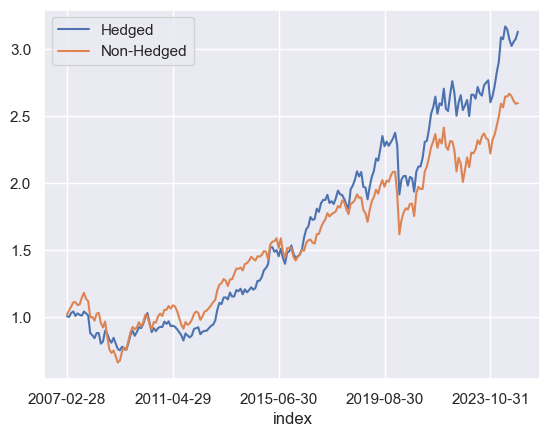

In [161]:
df_mv_hedged['cumprod_mv_return'] = (1 + df_mv_hedged['mv_return']).cumprod()
df_mv_non_hedged['cumprod_mv_return'] = (1 + df_mv_non_hedged['mv_return']).cumprod()

df_mv_hedged['cumprod_mv_return'].plot()
df_mv_non_hedged['cumprod_mv_return'].plot()
plt.legend(['Hedged', 'Non-Hedged'])
plt.show()

In [162]:
sharpe_mv_hedged = compute_sharpe_ratio(df_mv_hedged['mv_return'], df_mv_hedged['rf_US'])
sharpe_mv_non_hedged = compute_sharpe_ratio(df_mv_non_hedged['mv_return'], df_mv_non_hedged['rf_US'])

print(f'The Sharpe ratio of the hedged MV strategy is : {sharpe_mv_hedged}')
print(f'The mean of returns is : {df_mv_hedged["mv_return"].mean()}')
print(f'The std of returns is : {df_mv_hedged["mv_return"].std()}')
print('--'*20)
print(f'The Sharpe ratio of the non hedged MV strategy is : {sharpe_mv_non_hedged}')
print(f'The mean of returns is : {df_mv_non_hedged["mv_return"].mean()}')
print(f'The std of returns is : {df_mv_non_hedged["mv_return"].std()}')

The Sharpe ratio of the hedged MV strategy is : 2.1643821197616644
The mean of returns is : 0.00602445692761312
The std of returns is : 0.0365716696996432
----------------------------------------
The Sharpe ratio of the non hedged MV strategy is : 1.7614111403333834
The mean of returns is : 0.005175111903731182
The std of returns is : 0.03728381876386704
